# Stack Overflow Developer Survey Data

## Background


### About the Dataset
Stack Overflow, the go-to platform for developers, conduct an annual developer survey to capture insights into the developer community. This survey includes various questions related to professional experience, coding activities, tools, technologies, and preferences. The dataset used in this project explores the 2024 survey results and offers important information about the current state of software development worldwide. The survey data consists of responses from developers with different professional backgrounds, educational levels and geographic locations.

The dataset is available as part of the Stack Overflow Developer Survey under an Open Database License (ODbL). The full data set can be accessed at this link: https://survey.stackoverflow.co/


### Objective
We aim to gain insights into the most popular programming languages, platforms, and frameworks, as well as the challenges and opportunities facing developers today by exploring the survey data. 

These are some of the questions / insights we wish to explore in detail:
- what is the demographic of the respondents in the survey - country, age etc.?
- what are the most commonly used programming languages?
- what are the most common jobs in developers?
- what is the most popular method of learning how to code?
- how many developers work remotely?


### Process

In this project, I will load the dataset from the local computer and preview the dataset. Additionally, I will load the schema file to understand the survey questions associated with different columns. After previewing the data, I will move on to Data Cleaning / Data Wrangling which will involve looking for and handling duplicate values, missing values and outliers in key columns of the data. Once the data is cleaned, I will move on to Exploratory Data Analysis which will involve data visualization and identifying patterns and trends in the data. 


### Table of Contents
This process and the contents of this notebook have been summarized below:

1. [Data Collection](#1.-Data-Collection)
2. [Data Cleaning](#2.-Data-Cleaning)
   - [Handling Duplicate Data](#Duplicates)
   - [Handling Missing Values](#Missing-Values)
   - [Handling Outliers](#Outliers)
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
   - [Demographics](#Demographics)
   - [Employment](#Employment)
   - [Programming Experience](#Programming-Experience)
4. [Final Inferences and Conclusion](#4.-Final-Inferences-and-Conclusion)

## 1. Data Collection

In [122]:
# import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# read the data & display first few rows to understand data
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [124]:
# shape of the data - (rows, columns)
df.shape

(65437, 114)

Initial observations: this dataset includes 65437 rows and 114 columns - this represents the survey results of 65437 respondents for 114 questions. Some key columns that are visible in the table are:
- Response ID: a uinque identifier for each respondent
- MainBranch: the main professional role of the respondent
- Age: age bracket where the respondent belongs
- Employment: the employment status of the respondent
- RemoteWork: the work type of the respondent - remote or hybrid etc
- CodingActivities: Types of coding activities respondent engages in
- EdLevel: highest level of education
- LearnCode: resources used to learn code
- LearnCodeOnline: resources used to learn code online

Evidently, some columns contain missing values (NaN) which indicate that many respondents left incomplete responses.

In [125]:
# read the schema data to understand survey questions better
schema = pd.read_csv('survey_results_schema.csv',index_col='qname')
schema.head()

,qid,question,force_resp,type,selector
qname,,,,,
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Age,QID127,What is your age?*,True,MC,SAVR
Employment,QID296,Which of the following best describes your cur...,True,MC,MAVR
RemoteWork,QID308,Which best describes your current work situation?,False,MC,SAVR
Check,QID341,Just checking to make sure you are paying atte...,True,MC,SAVR


In [126]:
# as we are only interested in the qname and question columns for the purpose of this analysis, convert to Panda series
schema_series = schema['question']

# remove the html tags from the question columnc
from bs4 import BeautifulSoup
import re

def clean_html(text):
    if bool(re.search(r'<[^>]+>', str(text))):  # check for HTML tags
        return BeautifulSoup(text, 'html.parser').get_text()
    return text
    
# apply the above function to each element in list
schema_series = schema_series.apply(clean_html)
schema_series['Country']

'Where do you live? *'

In [127]:
# inspect the column names and data types of all columns
pd.set_option('display.max_rows', None)
print(df.dtypes)

ResponseId                          int64
MainBranch                         object
Age                                object
Employment                         object
RemoteWork                         object
Check                              object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
TechDoc                            object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
BuildvsBuy                         object
TechEndorse                        object
Country                            object
Currency                           object
CompTotal                         float64
LanguageHaveWorkedWith             object
LanguageWantToWorkWith            

In [128]:
# view summary statistics for the numerical columns of dataset
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [129]:
# view summary statistics for categorical / text columns
df.describe(include = 'object')

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
count,65437,65437,65437,54806,65437,54466,60784,60488,49237,40897,...,27710,28911,28844,28251,27764,28491,28807,28858,56182,56238
unique,5,8,110,3,1,118,8,418,10853,113,...,5,5,5,954,514,3,9,15,3,3
top,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Appropriate in length,Easy
freq,50207,23911,39041,23015,65437,9993,24942,3674,603,6947,...,14426,10951,9341,2364,2834,13230,15813,11918,38767,30071


Other Observations: There are a total of 114 columns which indicate the survey had an extensive number of questions ranging from the respondent's demographic to their coding learning, job satisfaction, favourite platforms, and much more. Within the categorical variables, there are many which have multiple choice answers as evident from the long string with semicolon as delimiter.

## 2. Data Cleaning

### Duplicates

In [130]:
# check for duplicate rows
df.duplicated().sum()

0

There are no duplicate rows in this dataset. This confirms that each of the 65437 rows represents a unique respondent. We can confirm this by checking if each Response ID is unique:

In [131]:
df['ResponseId'].is_unique

True

### Missing Values

#### Finding Missing Values

In [132]:
# count missing values per column
missing_info = df.isnull().sum().to_frame(name='Missing Count')

# Keep only columns with missing data
missing_info = missing_info[missing_info['Missing Count'] > 0]

# Add a column for non-missing values
missing_info['Non-Missing Count'] = df.shape[0] - missing_info['Missing Count']

# percentage of column that is missing
missing_info['Missing %'] = (df.isnull().mean() * 100)

# Sort by % missing (you can change to 'Missing Count' if you prefer)
missing_info = missing_info.sort_values(by='Missing %', ascending=False)

missing_info

,Missing Count,Non-Missing Count,Missing %
AINextMuch less integrated,64289,1148,98.245641
AINextLess integrated,63082,2355,96.401119
AINextNo change,52939,12498,80.900714
AINextMuch more integrated,51999,13438,79.464217
EmbeddedAdmired,48704,16733,74.428840
EmbeddedWantToWorkWith,47837,17600,73.103901
EmbeddedHaveWorkedWith,43223,22214,66.052845
ConvertedCompYearly,42002,23435,64.186928
AIToolNot interested in Using,41023,24414,62.690832
AINextMore integrated,41009,24428,62.669438


#### Visualize the Missing Data

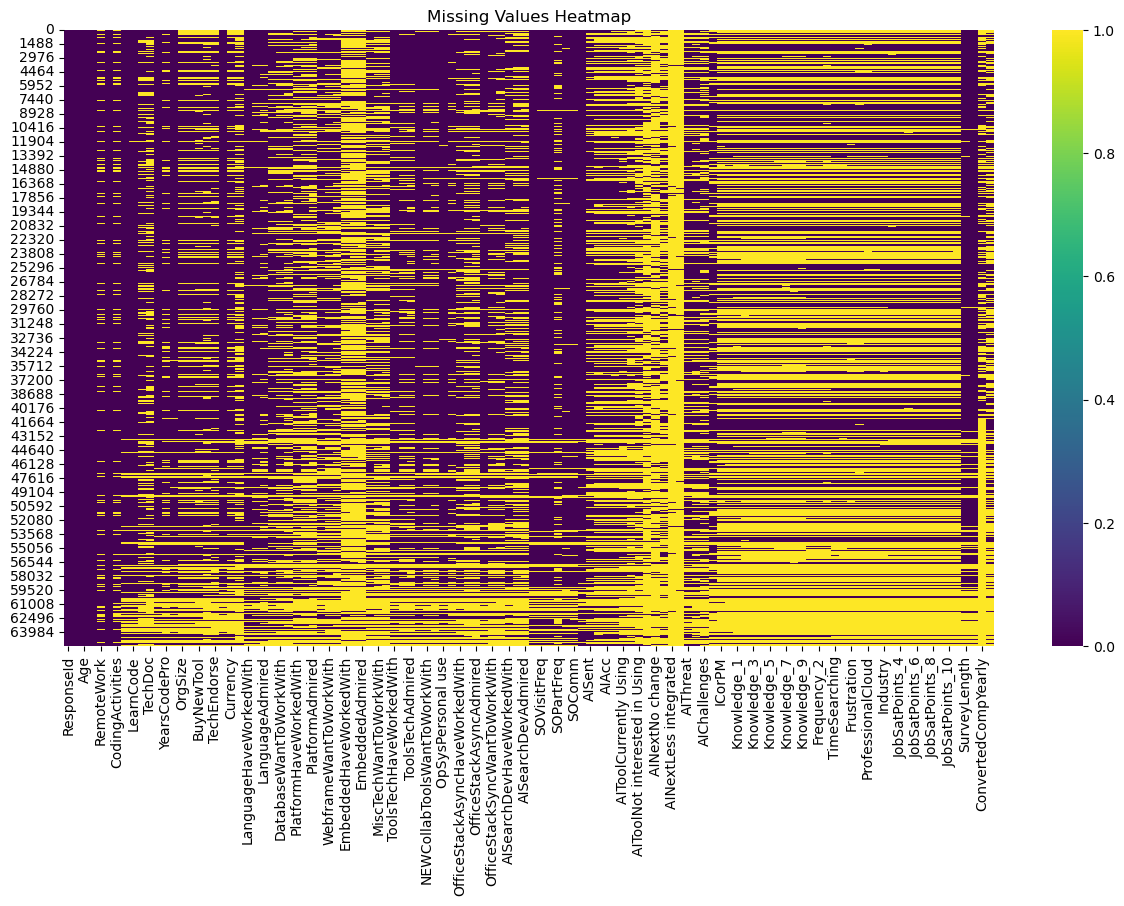

In [133]:
plt.figure(figsize=(15, 8))

# Create heatmap — True means missing (NaN), False means not missing
sns.heatmap(df.isnull(), cmap='viridis')

# Set title
plt.title('Missing Values Heatmap')
plt.show()

Observations: There are a lot of columns in this dataset with a significant proportion of missing values. For the purpose of this analysis, it would be useful to remove the columns with a very high proportion (>70%) of missing values. From the visualization above, we can also see that there are some patterns in the missing data across rows, i.e. most of the missing values are spread across the row. It would be useful to identify the rows with a very high proportion of missing information and deleting these.

#### Remove Columns with High Number of Missing Values

In [134]:
# Identify columns with more than 50% missing values
high_missing_cols = missing_info[missing_info['Missing %'] > 70].index.tolist()
high_missing_cols

['AINextMuch less integrated',
 'AINextLess integrated',
 'AINextNo change',
 'AINextMuch more integrated',
 'EmbeddedAdmired',
 'EmbeddedWantToWorkWith']

In [135]:
# create a new df for cleaned data
df_clean = df.drop(columns=high_missing_cols)
# check to ensure columns have reduced from 114 to 108 after removing 6 cols
df_clean.shape

(65437, 108)

#### Remove Rows with High Number of Missing Values

In [136]:
# Calculate percentage of missing values per row
row_missing_percent = df_clean.isnull().mean(axis=1) * 100
# Find rows where, say, 90% or more of values are missing
mostly_empty_rows = df_clean[row_missing_percent >= 90]
mostly_empty_rows.shape

(2026, 108)

In [137]:
# drop the rows with more than 90% missing values (create another df for cleaned data)
df_clean = df_clean[row_missing_percent < 90]
# check to ensure rows have been dropped
df_clean.shape

(63411, 108)

#### Imputation

Many columns include a large proportion of missing values in this dataset. For the purpose of this analysis, we will impute missing values in the following columns:

- Country
- EdLevel
- RemoteWork


##### Country

In [138]:
# identify how many missing values in 'Country' column
sum(df_clean['Country'].isnull())

4492

This is approximate 4492/63411 = 7% of rows with missing data. To avoid biasing the analysis, I will impute these missing values with a 'Not Specified' value to keep the rows and avoid misrepresenting them.

In [139]:
# fill missing values in 'Country' column with 'Not specified'
df_clean['Country'] = df_clean['Country'].fillna('Not specified')

In [140]:
# check for missing values now
sum(df_clean['Country'].isnull())

0

##### EdLevel

In [141]:
sum(df_clean['EdLevel'].isnull())

2949

This is approximate 4653/63411 = 7% of rows with missing data. It can be important to see the values in this column.

In [142]:
# identify unique values in the EdLevel column
df_clean['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24815
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15492
Some college/university study without earning a degree                                 7613
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5742
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2958
Associate degree (A.A., A.S., etc.)                                                    1785
Primary/elementary school                                                              1136
Something else                                                                          921
Name: count, dtype: int64

Since the mode respone to this survey question was 'Bachelor's degree', filling missing values with this is less likely to introduce a bias. As only 7% values are missing, we will impute these with the mode.

In [143]:
# impute missing values in EdLevel with mode
df_clean['EdLevel'] = df_clean['EdLevel'].replace(np.nan, df_clean['EdLevel'].value_counts().idxmax())

In [144]:
# check that there are no more missing values in EdLevel column
sum(df_clean['EdLevel'].isnull())

0

##### RemoteWork

In [145]:
sum(df_clean['RemoteWork'].isnull())

10039

This is approximate 10039/63411 = 16% of rows with missing data. It can be important to see the values in this column.

In [146]:
df_clean['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    22439
Remote                                  20414
In-person                               10519
Name: count, dtype: int64

Since these are clear, meaningful categories, it's best NOT to impute with mode or mix missing with existing categories. Instead, we will treat missing values as its own category by introducing “Not specified”. This will keep the data honest and analysis clean.

In [147]:
# replace missing values with 'not specified'
df_clean['RemoteWork'] = df_clean['RemoteWork'].fillna('Not specified')

In [148]:
# check that there are no more missing values in RemoteWork column
sum(df_clean['RemoteWork'].isnull())

0

### Outliers

The ConvertedCompYearly column represents the annual income for the respondent, converted to USD.
We will look for outliers in this numerical columns.

In [149]:
df_clean.shape

(63411, 108)

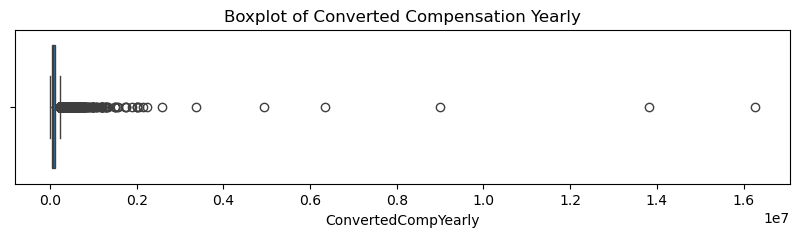

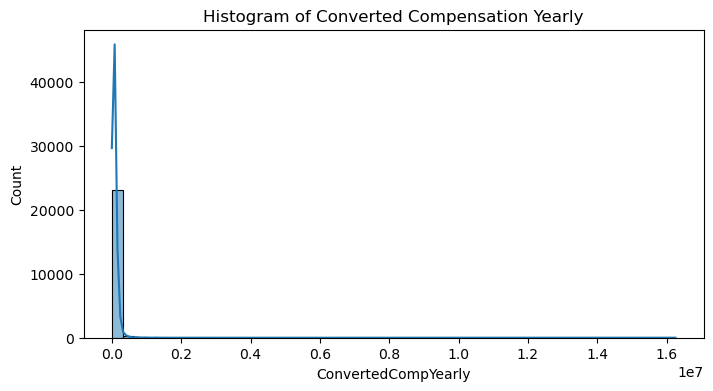

In [150]:
# Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_clean['ConvertedCompYearly'])
plt.title('Boxplot of Converted Compensation Yearly')
plt.show()

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Histogram of Converted Compensation Yearly')
plt.show()

Evidently, there are many extreme values on the high end of the converted comp yearly. This indicates some very high outliers that should be removed to minimize the impact of extreme values in our analysis and visualization.

In [151]:
sum(df_clean['ConvertedCompYearly'].isnull())

39976

In [152]:
# identifying outliers using the IQR method
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 3 * IQR  # more lenient upper bound for right skewed compensation data

# Identify outliers 
outliers = df_clean[
    (df_clean['ConvertedCompYearly'] < lower_bound) | 
    (df_clean['ConvertedCompYearly'] > upper_bound)
]

print(f"Number of outliers: {len(outliers)}")

Number of outliers: 316


In [153]:
# remove the outliers (retain missing values as there are many)
df_clean = df_clean[(df_clean['ConvertedCompYearly'].isna()) | 
                         ((df_clean['ConvertedCompYearly'] >= lower_bound) & 
                          (df_clean['ConvertedCompYearly'] <= upper_bound))]

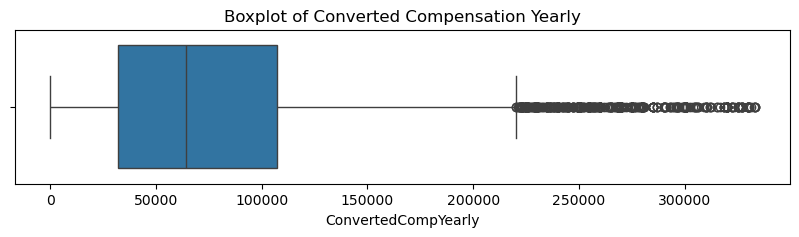

In [154]:
# visualize to see impact of removing outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_clean['ConvertedCompYearly'])
plt.title('Boxplot of Converted Compensation Yearly')
plt.show()

In [155]:
# Final cleaned dataframe for visualization
df_clean.shape

(63095, 108)

After applying data wrangling to deal with missing values and outliers in selected columns, we have reduced the shape of the dataframe from (65437,114) to (63095,108).

## 3. Exploratory Data Analysis

### Demographics

Let's explore the demographics of the respondents to this survey. We will focus on the following columns to gain insights:
- Country
- Age
- Education level

This will give us a good understanding of the background of the respondents, and can help identify any potential selection bias.

#### Country

In [156]:
# identify the question associated with 'Country' column
schema_series.Country

'Where do you live? *'

In [157]:
len(df_clean['Country'])

63095

In [158]:
# number of unique values in Country column
df_clean['Country'].nunique()

186

In [159]:
# identify the top 15 countries
top_countries = df_clean.Country.value_counts().head(15)
top_countries

Country
United States of America                                10883
Germany                                                  4940
Not specified                                            4492
India                                                    4223
United Kingdom of Great Britain and Northern Ireland     3203
Ukraine                                                  2668
France                                                   2106
Canada                                                   2096
Poland                                                   1533
Netherlands                                              1447
Brazil                                                   1370
Italy                                                    1340
Australia                                                1255
Spain                                                    1122
Sweden                                                   1015
Name: count, dtype: int64

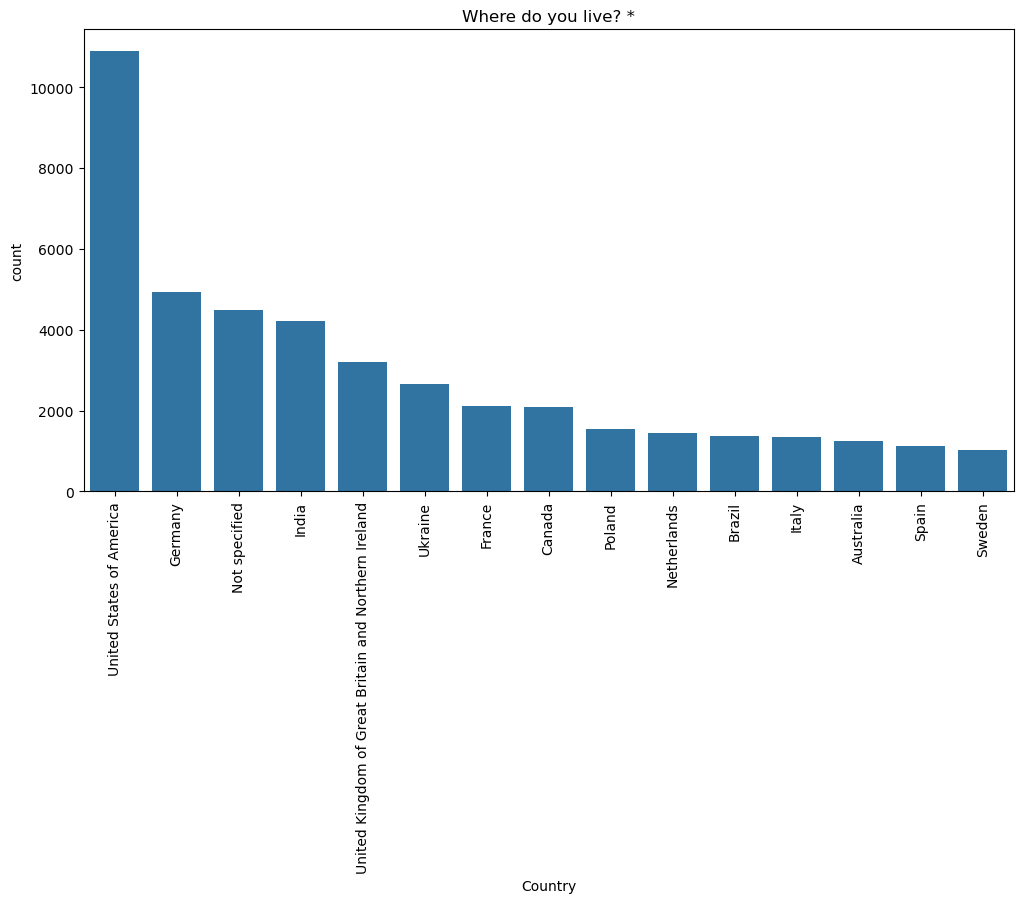

In [160]:
# plot the top 15 countries
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title(schema_series.Country)
sns.barplot(x=top_countries.index, y=top_countries);

From the above results, we can see the the majority of the respondents are from the US, and therefore it indicates the responses may not be a good representation of the global programming community. There is likely some underrepresentation from non-English speaking countries, as these are on the lower end of the graph above. There are a total of 186 unique countries from which the respondents are.

In [161]:
# create a countries df
country_counts = df_clean['Country'].value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df.head()

,Country,Count
0,United States of America,10883
1,Germany,4940
2,Not specified,4492
3,India,4223
4,United Kingdom of Great Britain and Northern I...,3203


In [162]:
import folium

# get countries geojson file
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Respondents',
    reset=True
).add_to(world_map)

world_map

As we could see from the previous table, the majority of the respoindents are from US, then Germany, India, and so on. We can see from the map that there are few respondents from other countries.

#### Age

In [163]:
schema_series.Age

'What is your age?*'

In [164]:
age_counts = df_clean['Age'].value_counts()
age_counts

Age
25-34 years old       23057
35-44 years old       14524
18-24 years old       13405
45-54 years old        6103
55-64 years old        2522
Under 18 years old     2434
65 years or older       756
Prefer not to say       294
Name: count, dtype: int64

In [165]:
age_counts_df = pd.DataFrame({'Age': age_counts.index, 'Count': age_counts.values})
age_counts_df

,Age,Count
0,25-34 years old,23057
1,35-44 years old,14524
2,18-24 years old,13405
3,45-54 years old,6103
4,55-64 years old,2522
5,Under 18 years old,2434
6,65 years or older,756
7,Prefer not to say,294


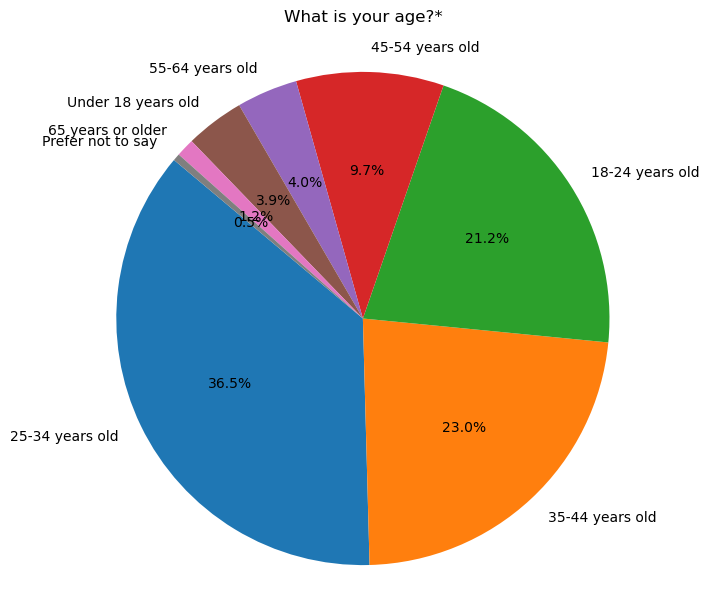

In [166]:
plt.figure(figsize=(7, 7))
plt.pie(age_counts_df['Count'], labels=age_counts_df['Age'], autopct='%1.1f%%', startangle=140)
plt.title(schema_series.Age, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

More than 80% of the respondents are between 18 and 44 years of age, with more than half being between 18-34 years old. This indicates a large proportion of younger people which makes sense as computer science and programming has become a more popular hobby and profession in more recent years.

#### Education Level

In [167]:
schema_series.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [168]:
edlevel_counts = df_clean['EdLevel'].value_counts()
edlevel_counts_df = pd.DataFrame({'EdLevel': edlevel_counts.index, 'Count': edlevel_counts.values})
edlevel_counts_df

,EdLevel,Count
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27624
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15390
2,Some college/university study without earning ...,7583
3,"Secondary school (e.g. American high school, G...",5738
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2927
5,"Associate degree (A.A., A.S., etc.)",1779
6,Primary/elementary school,1135
7,Something else,919


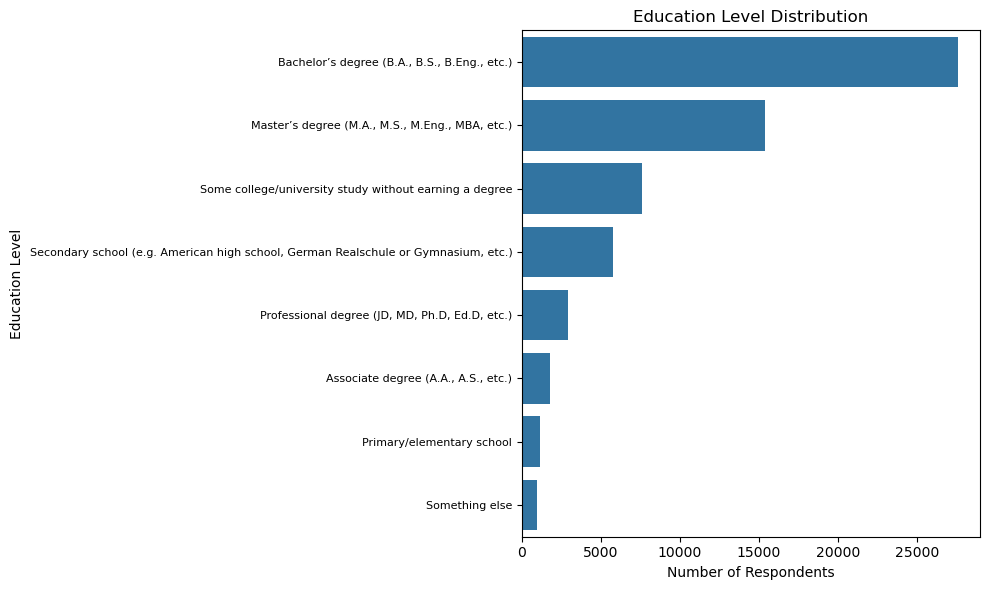

In [169]:
plt.figure(figsize=(10, 6))
sns.barplot(data=edlevel_counts_df, y='EdLevel', x='Count', order=edlevel_counts_df['EdLevel'])
plt.title('Education Level Distribution')
plt.ylabel('Education Level')
plt.xlabel('Number of Respondents')
plt.xticks()
plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

More than half of the respondents have a formal college degree, either bachelors or masters. However, this column alone does not specify what major the degree was done in. 

### Employment

#### Employment

In [170]:
schema_series.Employment

'Which of the following best describes your current employment status? Select all that apply.*'

In [171]:
df_clean['Employment'].value_counts().head()

Employment
Employed, full-time                                                         37780
Independent contractor, freelancer, or self-employed                         4689
Student, full-time                                                           4441
Employed, full-time;Independent contractor, freelancer, or self-employed     3455
Not employed, but looking for work                                           2239
Name: count, dtype: int64

The Employment field allows multiple answers, so the column contains lists of values separated by a semi-colon ;. This makes it a bit harder to analyze directly. We will need to split the values and then plot the occurrence of each employment type.

In [172]:
from collections import Counter

# Drop missing values from the 'Employment' column
employment_data = df_clean['Employment']

# Split values and flatten into a single list
all_employment_types = [emp.strip() 
                        for row in employment_data 
                        for emp in row.split(';')]

# Count occurrences
employment_counts = Counter(all_employment_types)

# Convert to DataFrame
employment_df = pd.DataFrame(employment_counts.items(), columns=['Employment Type', 'Count'])
employment_df = employment_df.sort_values(by='Count', ascending=False)
employment_df

,Employment Type,Count
0,"Employed, full-time",43715
3,"Independent contractor, freelancer, or self-em...",10402
1,"Student, full-time",8230
6,"Employed, part-time",4010
2,"Not employed, but looking for work",3800
5,"Student, part-time",2536
4,"Not employed, and not looking for work",1141
8,Retired,660
7,I prefer not to say,486


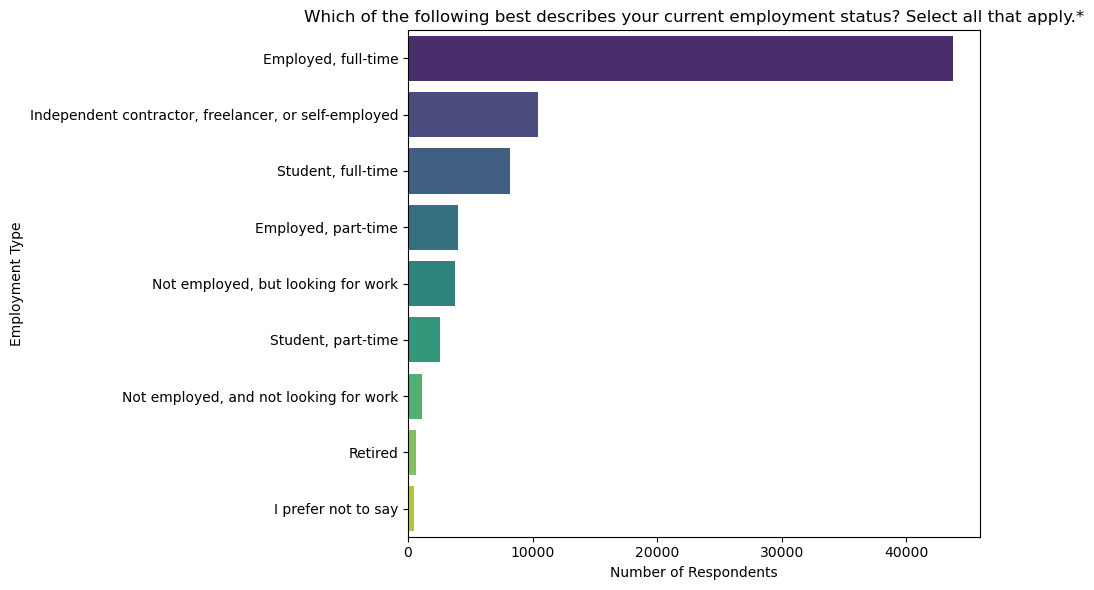

In [173]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=employment_df, y='Employment Type', x='Count', palette='viridis', hue='Employment Type',legend=False)
plt.title(schema_series['Employment'])
plt.xlabel('Number of Respondents')
plt.ylabel('Employment Type')
plt.tight_layout()
plt.show()

Observation: the majority of the respondents are employed full time, and fewer are independent contractor or self-employed. 

#### DevType

In [174]:
schema_series['DevType']

'Which of the following describes your current job, the one you do most of the time? Please select only one.'

In [175]:
df_clean['DevType'].value_counts()

DevType
Developer, full-stack                            18207
Developer, back-end                               9856
Student                                           5094
Developer, front-end                              3336
Developer, desktop or enterprise applications     2480
Other (please specify):                           2445
Developer, mobile                                 2006
Developer, embedded applications or devices       1611
Engineering manager                               1253
Academic researcher                               1235
Data engineer                                     1112
Data scientist or machine learning specialist     1016
DevOps specialist                                 1015
Research & Development role                        937
Senior Executive (C-Suite, VP, etc.)               803
Developer, game or graphics                        705
Cloud infrastructure engineer                      624
System administrator                               552
De

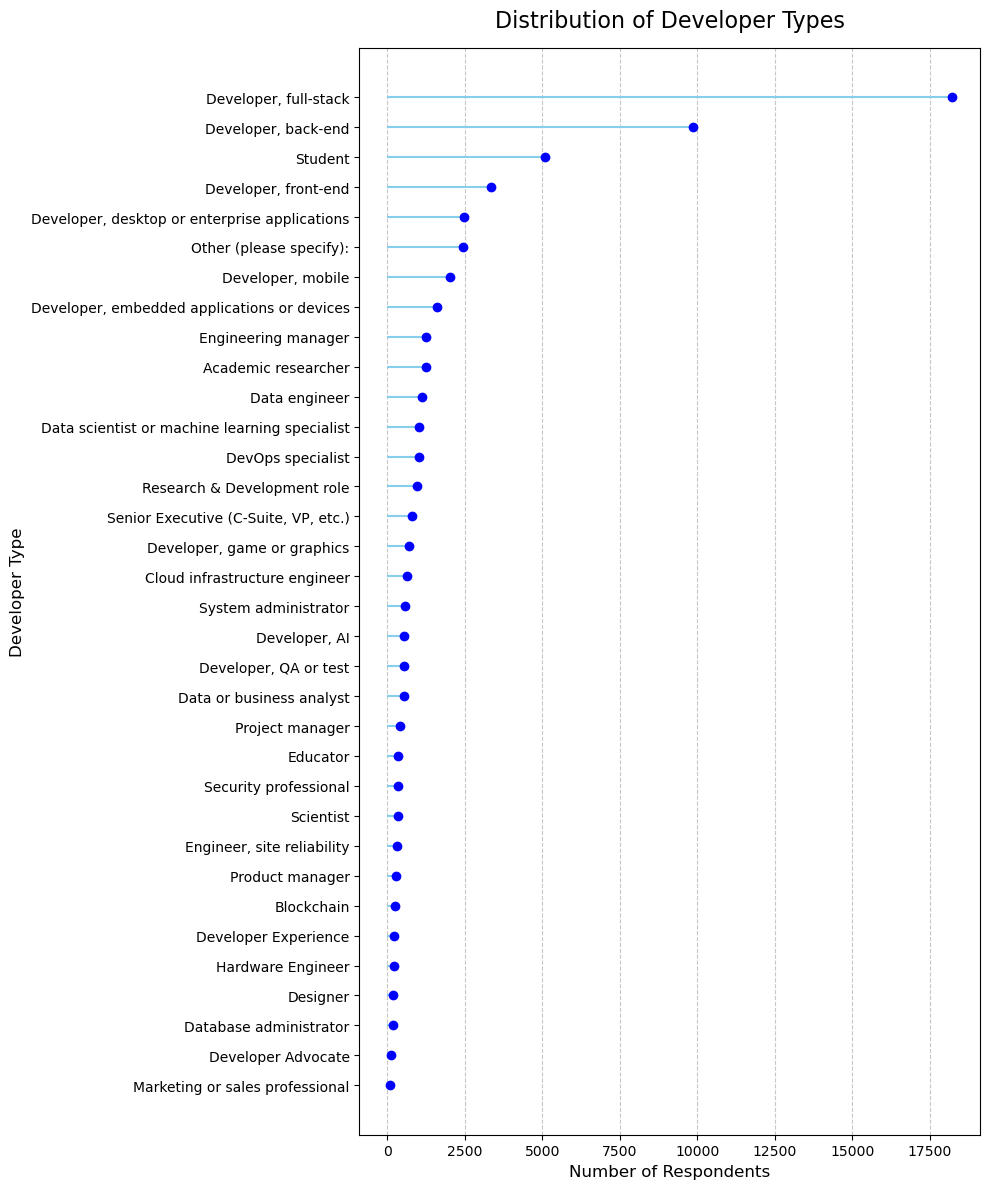

In [176]:
# DevType value_counts
devtype_counts = df_clean['DevType'].value_counts()

# Sort descending
devtype_counts = devtype_counts.sort_values(ascending=True)

# Set figure size
plt.figure(figsize=(10, 12))

# Horizontal lollipop chart
plt.hlines(y=devtype_counts.index, xmin=0, xmax=devtype_counts.values, color='skyblue')
plt.plot(devtype_counts.values, devtype_counts.index, "o", color='blue')

# Add titles and labels
plt.title("Distribution of Developer Types", fontsize=16, pad=15)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Developer Type", fontsize=12)

# Optional: add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

Observation: most of the respondents are developer full stack. The professions towards the end of the chart are typically not associated with heavy programming so likely represent the respondents who code as a hobby or are developing a side project, for example. Over 5000 of the respondents are students.


#### RemoteWork

In [177]:
schema_series['RemoteWork']

'Which best describes your current work situation?'

In [178]:
df_clean['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    22332
Remote                                  20260
In-person                               10464
Not specified                           10039
Name: count, dtype: int64

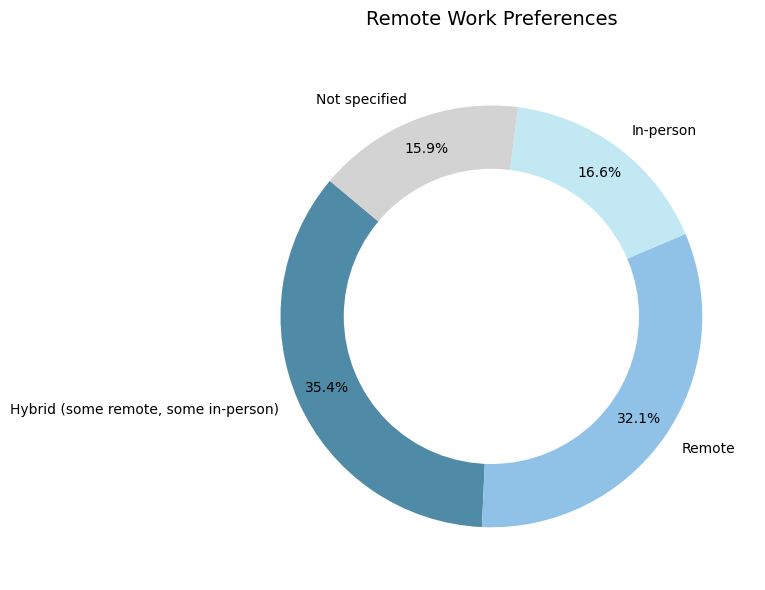

In [179]:
# Get value counts
remote_counts = df_clean['RemoteWork'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    remote_counts, 
    labels=remote_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    pctdistance=0.85,
    colors=['#4F8AA6', '#90C2E7', '#C2E8F3', '#D3D3D3']
)

# Draw center circle for donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add title
ax.set_title("Remote Work Preferences", fontsize=14, pad=20)

plt.tight_layout()
plt.show()

Observation: most of the respondents do hybrid work, followed by remote. As this is a recent 2024 survey, it is representative of the current job market as remote and hybrid work is more popular than in-person.

#### Compensation

In [180]:
schema_series['CompTotal']

'What is your current total annual compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent yearly salary. If you prefer not to answer, please leave the box empty. '

In [181]:
len(df_clean['ConvertedCompYearly'])

63095

In [182]:
sum(df_clean['ConvertedCompYearly'].isnull())

39976

In [183]:
# Define smaller bins, say every 10k up to 200k, then larger bins beyond that
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 
        120000, 140000, 160000, 180000, 200000, 250000, 300000, 400000, np.inf]

# Create labels for bins
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k',
          '100k-120k', '120k-140k', '140k-160k', '160k-180k', '180k-200k', '200k-250k', '250k-300k', '300k-400k', '400k+']

# Bin the data
comp_bins = pd.cut(df_clean['ConvertedCompYearly'], bins=bins, labels=labels, right=False)

# Get counts per bin, including NaNs if you want to exclude just do dropna()
bin_counts = comp_bins.value_counts().sort_index()
print(bin_counts)


ConvertedCompYearly
<10k         2403
10k-20k      1482
20k-30k      1449
30k-40k      1621
40k-50k      1783
50k-60k      1910
60k-70k      1805
70k-80k      1601
80k-90k      1410
90k-100k     1143
100k-120k    1849
120k-140k    1304
140k-160k     951
160k-180k     735
180k-200k     506
200k-250k     732
250k-300k     296
300k-400k     139
400k+           0
Name: count, dtype: int64


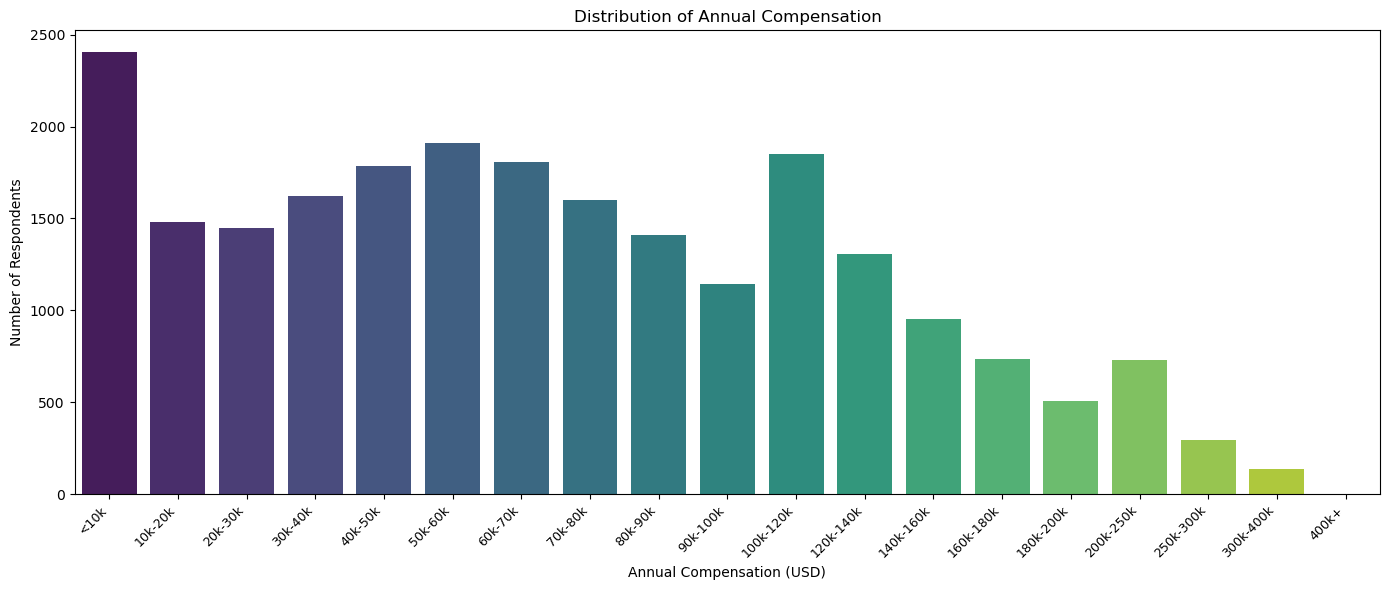

In [184]:
# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=bin_counts.index, y=bin_counts.values, palette='viridis', hue=bin_counts.index, legend=False)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Annual Compensation')
plt.tight_layout()
plt.show()

Observation: As outliers have been previously identified and removed from this column, the right skew is not so prevalent but it is still visible. The majority of the respondents fall in the <\\$10k category with very few earning over \\$250k. It is important to note, however, the large number of null values in this column (39976 non responses) which may make it difficult to generalize trends based on these results.

In [185]:
# Drop rows with null compensation
df_non_null = df_clean.dropna(subset=['ConvertedCompYearly'])

# Function to calculate IQR
def calculate_iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# Group by DevType and calculate median and IQR
devtype_stats = df_non_null.groupby('DevType')['ConvertedCompYearly'].agg(
    median='median',
    IQR=calculate_iqr
).sort_values(by='median', ascending=False)

# Display the result
print(devtype_stats)

                                                 median        IQR
DevType                                                           
Developer Advocate                             120509.0  114763.50
Senior Executive (C-Suite, VP, etc.)           113000.0  114093.00
Engineering manager                            112777.0   87233.00
Developer Experience                           107406.0   99832.00
Engineer, site reliability                      96666.0  106370.50
Cloud infrastructure engineer                   94904.0   80715.00
Blockchain                                      80000.0  106298.00
Other (please specify):                         80000.0   85766.00
Product manager                                 77332.0   63476.00
Data engineer                                   75370.0   76932.00
Security professional                           75184.0   81679.00
Research & Development role                     75000.0   76111.50
Hardware Engineer                               75000.0   7687

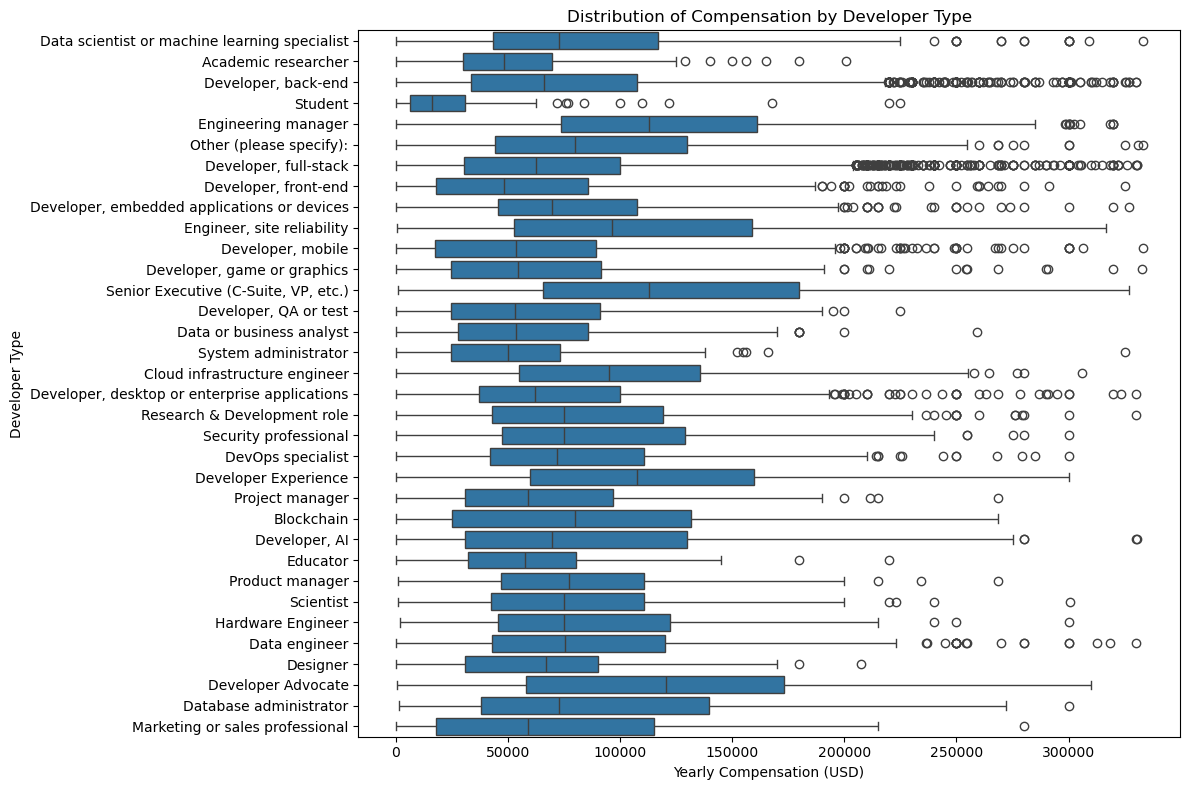

In [186]:
df_plot = df_clean[['DevType', 'ConvertedCompYearly']].dropna()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_plot, x='ConvertedCompYearly', y='DevType', orient='h')
plt.title('Distribution of Compensation by Developer Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Developer Type')
plt.tight_layout()
plt.show()

Observation: the median compensation and variance is highest for 'Developer Advocate' followed by 'Senior Executive'. On the other hand the median compensation and variation is lowest for 'Student'. These results are in line with our expectations of the compensation associated with these types of jobs. 

In [187]:
# Group by Age and calculate median and IQR
age_stats = df_non_null.groupby('Age')['ConvertedCompYearly'].agg(
    median='median',
    IQR=calculate_iqr
).sort_values(by='median', ascending=False)

# Display the result
print(age_stats)

                      median       IQR
Age                                   
Prefer not to say   140000.0  76828.00
55-64 years old     107406.0  86761.00
65 years or older   103518.0  92675.00
45-54 years old      96855.0  85000.00
35-44 years old      82802.0  71297.00
25-34 years old      59073.0  62979.75
18-24 years old      24762.0  41384.00
Under 18 years old    7626.5  15379.25


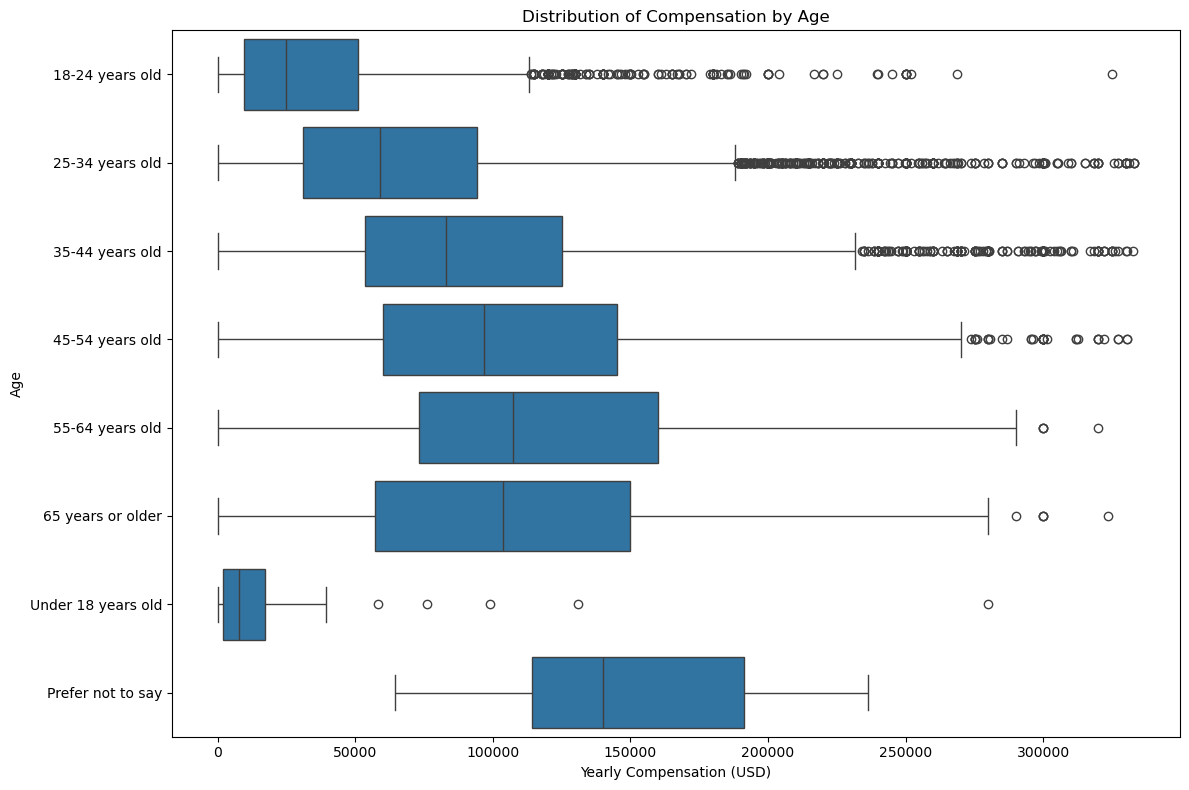

In [188]:
df_plot = df_clean[['Age', 'ConvertedCompYearly']].dropna()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_plot, x='ConvertedCompYearly', y='Age', orient='h')
plt.title('Distribution of Compensation by Age')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

Observation: As age increases, typically with more experience so does the total compensation. This is evident until ages 64 with the 55-64 age bracket having the highest yearly compensation. Under 18 yr olds are most likely to be students and therefore have the lowest compensation.

### Programming Experience

#### LearnCode

In [189]:
schema_series['LearnCode']

'How do you learn to code? Select all that apply.'

In [190]:
df_clean['LearnCode'].value_counts().head()

LearnCode
Other online resources (e.g., videos, blogs, forum, online community)                                                           3633
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community)                                    2463
Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)                   2341
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification    2271
Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                           2164
Name: count, dtype: int64

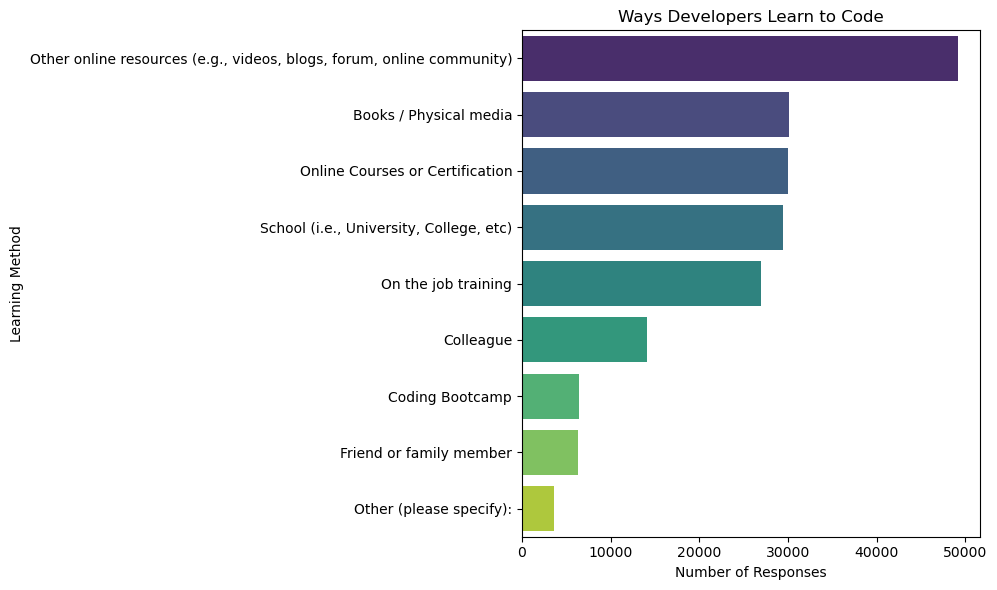

In [191]:
# clean data for plotting
df_learn = df_clean['LearnCode'].dropna()
# list of all methods for learning coding
learn_methods = [method.strip() for entry in df_learn for method in entry.split(';')]
# count occurrence of each method
learn_counts = Counter(learn_methods)

# convert into dataframe
learn_df = pd.DataFrame(learn_counts.items(), columns=['Method', 'Count'])
learn_df = learn_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=learn_df, y='Method', x='Count', palette='viridis', hue='Method',legend=False)
plt.title('Ways Developers Learn to Code')
plt.xlabel('Number of Responses')
plt.ylabel('Learning Method')
plt.tight_layout()
plt.show()

Observation: online resources were the most common ways the respondents learn to code, followed by books and physical media. 

#### Languages

In [192]:
!pip install wordcloud
from wordcloud import WordCloud

In [193]:
# drop missing values
lang_series = df_clean['LanguageHaveWorkedWith'].dropna()

# flatten all languages into a single list
all_languages = [lang.strip() for entry in lang_series for lang in entry.split(';')]

# create a DataFrame of counts
language_counts = pd.Series(all_languages).value_counts()
language_counts.head()

JavaScript    37227
HTML/CSS      31598
SQL           30476
Python        30423
TypeScript    22966
Name: count, dtype: int64

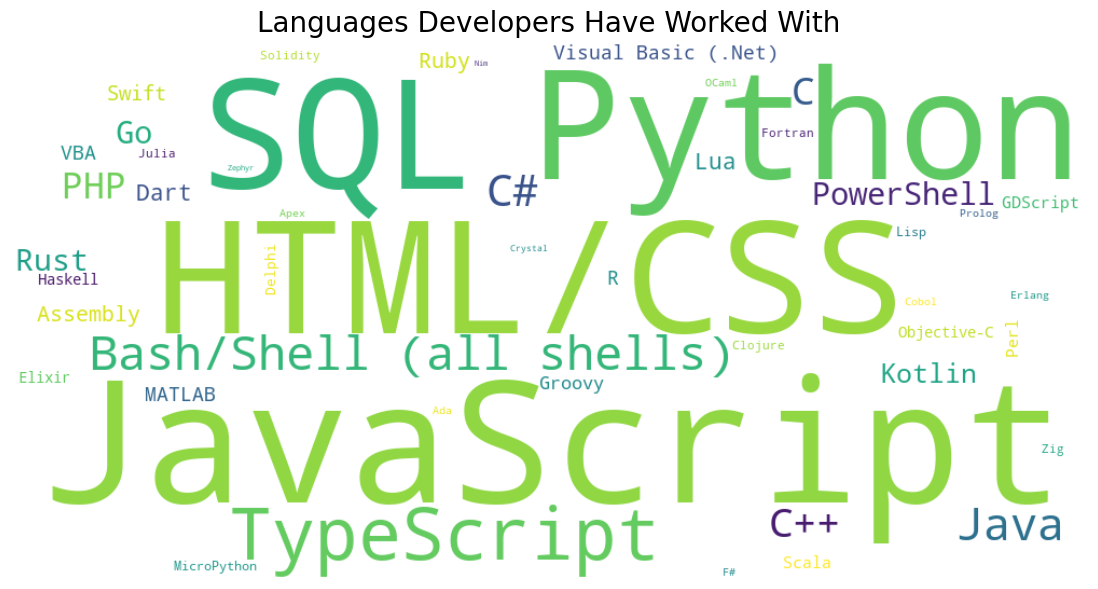

In [194]:
# convert to dictionary for word cloud
lang_dict = language_counts.to_dict()

# create and display the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate_from_frequencies(lang_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Languages Developers Have Worked With', fontsize=20)
plt.show()

Observation: Javascript is the most common language developers have worked with, followed closely by HTML/CSS and then SQL. This is inline with the response for DevType where the majority of respondents were in core software roles which would typically involve proficiency in JavaScript.  

## 4. Final Inferences and Conclusion

Through the above analysis, we are able to draw many interesting inferences regarding the 2024 Developer survey.

These are detailed below:

### Demographic:
#### Country:
The country-wise distribution shows that the majority of survey respondents (approximately 18%) are from the United States, followed by Germany (8%) and India (7%). Notably, around 7% of participants did not disclose their country.

While non-response is relatively small, it's worth considering whether it is random or systematic. If individuals from certain countries were disproportionately likely to withhold their country information, this could introduce a geographic bias. However, in the absence of evidence suggesting such a pattern, we can assume missingness is random.

Overall, the data suggests the survey has a reasonably global reach, though there is a heavier representation from English-speaking and Western countries. This is a common pattern in tech-related surveys and should be considered when generalizing findings to the global developer population.

#### Age: 
The age distribution of survey respondents indicates that the majority fall within the 18–44 age range, with 25–34-year-olds making up the largest segment (approximately 37%), followed by 35–44 (23%) and 18–24 (21%). This means that over 80% of respondents are younger than 45, suggesting that programming continues to attract a relatively younger demographic.

This trend is consistent with the broader rise in accessibility of coding education and the tech industry's expansion over the past two decades. The lower representation of respondents aged 45 and above (less than 16% combined) may reflect either a lower participation rate among older developers or a natural career transition into managerial or non-technical roles.

The small percentage (0.5%) who chose "Prefer not to say" is unlikely to meaningfully bias the results, assuming non-response is random. However, if older individuals were disproportionately more likely to withhold their age, it could slightly underrepresent senior professionals.

Overall, the data supports the inference that the developer community is predominantly composed of younger individuals, aligning with industry trends around early career starts, university tech programs, and coding bootcamps.

#### Education Level:
The data shows that most developers have formal education, with Bachelor’s degrees (44%) and Master’s degrees (25%) being the most common. Around 70% of respondents hold at least a bachelor's degree, indicating a strong academic background overall.

A smaller portion reported some college without a degree (12%), secondary school or lower (9%), or professional/associate degrees (8%). While the exact field of study isn't specified, it's clear that formal education plays a key role in many developers’ careers — though alternative paths like self-learning are also likely represented.

### Employment:
The majority of respondents (68%) are employed full-time, followed by independent contractors or freelancers (16%). About 13% are students, indicating a significant upcoming workforce. Only a small portion reported being unemployed (8%) or retired (1%). Overall, the data reflects a highly active and professionally engaged developer community.

The most common roles among respondents are full-stack (29%), back-end (16%), and front-end (5%) development, showing a strong focus on core software engineering. Notably, students make up nearly 8%, highlighting a pipeline of emerging talent. Specialized roles such as data scientists, DevOps, engineering managers, and AI developers are also well-represented, reflecting the growing diversification of the tech landscape. This variety suggests that the developer community spans a broad range of skills, from foundational programming to cutting-edge tech domains.

The majority of respondents work either in hybrid (35%) or fully remote (32%) setups, reflecting a strong shift toward flexible work models in the tech industry. Only 17% report working entirely in-person, suggesting that remote-capable roles have become the norm. However, 16% did not specify their work arrangement, which may slightly influence these proportions. Overall, the data indicates that remote and hybrid work options are now a standard expectation among developers globally.

#### Compensation:
Among the valid responses (~23,000 participants), most developers reported annual compensation between \\$10,000 and \\$140,000 USD, with the highest concentration in the \\$50,000–\\$60,000 range. Roughly 68% of all non-null respondents fall within the \\$10k–\\$100k range, highlighting that the bulk of global developer compensation tends to be modest.

While a smaller number of respondents earn over \\$150,000, the numbers drop off sharply beyond that, and no valid entries were found over \\$400,000, possibly due to privacy concerns or data exclusion during cleaning.

It's also important to note that nearly 63% of the original dataset did not disclose their compensation. This high number of nulls suggests caution when generalizing compensation trends, as self-reported salary data can be skewed due to privacy, cultural norms, or regional differences in transparency.

DevType & Compensation: The compensation data reveals that senior and specialized roles—such as Developer Advocates, Senior Executives, and Engineering Managers—tend to earn the highest median salaries, all above //$110,000. Infrastructure-focused and niche roles like Site Reliability Engineers and Blockchain Developers also show strong compensation. In contrast, traditional development roles like front-end and full-stack developers fall in the mid-range, while students and academic researchers earn the least. Many roles exhibit wide income variability (high IQR), suggesting pay differences based on experience, geography, or employment type. These insights are based on available data and exclude a large number of respondents who did not disclose their compensation.

Age & Compensation: A clear positive relationship was observed between age and compensation, reflecting how income generally increases with experience. Median annual salaries rise steadily from younger to older age groups—those under 18 earn the least (~//$7.6k), while those aged 55–64 and above 65 have median earnings above //$100k. The interquartile ranges (IQRs) also widen with age, suggesting greater variability in pay among older respondents, likely due to differences in seniority, roles, or industries. Those who preferred not to disclose their age reported the highest median compensation, which could indicate a tendency for higher earners to be more private. These results exclude non-responses for compensation and may not reflect early retirees or part-time older workers who chose not to participate.


### Programming Languages:

### Learn Code:
From this data, it’s clear that "Other online resources"—like videos, blogs, forums, and communities—are the most commonly used method for learning to code, either alone or in combination with other methods. This indicates a strong preference among learners for flexible, self-directed, and often free learning options. Many also supplement these with books, formal education (like university), or structured online courses and certifications, showing that learners often blend traditional and modern resources. Overall, this highlights the importance of accessible, community-driven learning in the programming world today.

### Languages Worked with:
JavaScript, HTML/CSS, SQL, and Python are the most commonly used programming languages among respondents—each with over 30,000 mentions. These languages are foundational for web development and data work, highlighting their central role in today’s tech landscape.

Languages like TypeScript, Bash, Java, and C# also show strong usage, reflecting widespread use in both frontend/backend development and systems programming. As we move down the list, we see more niche, domain-specific, or emerging languages (e.g., Rust, Kotlin, Dart, Elixir, Solidity), indicating a diverse ecosystem where developers often learn multiple tools depending on their area of focus.

In short, this distribution reflects both industry demand and community preferences, with a strong leaning toward languages that support web development, data, and scalable backend solutions.